<a href="https://colab.research.google.com/github/NIlesh-Thamke/Machine-Learning-Practicals/blob/main/Practical1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:

from google.colab import files
file = files.upload()


Saving ICRISAT-District Level Data.csv to ICRISAT-District Level Data (1).csv


In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf

In [7]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [5]:
df = pd.read_csv('/content/ICRISAT-District Level Data.csv')

print(df.head())

print(df.isnull().sum())


   Dist Code  Year  State Code    State Name Dist Name  RICE AREA (1000 ha)  \
0          1  1966          14  Chhattisgarh      Durg                548.0   
1          1  1967          14  Chhattisgarh      Durg                547.0   
2          1  1968          14  Chhattisgarh      Durg                556.3   
3          1  1969          14  Chhattisgarh      Durg                563.4   
4          1  1970          14  Chhattisgarh      Durg                571.6   

   RICE PRODUCTION (1000 tons)  RICE YIELD (Kg per ha)  WHEAT AREA (1000 ha)  \
0                        185.0                  337.59                  44.0   
1                        409.0                  747.71                  50.0   
2                        468.0                  841.27                  53.7   
3                        400.8                  711.40                  49.4   
4                        473.6                  828.55                  44.2   

   WHEAT PRODUCTION (1000 tons)  ...  SUGARC

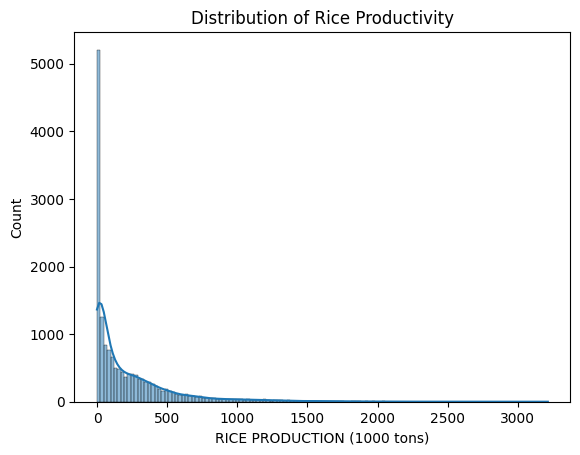

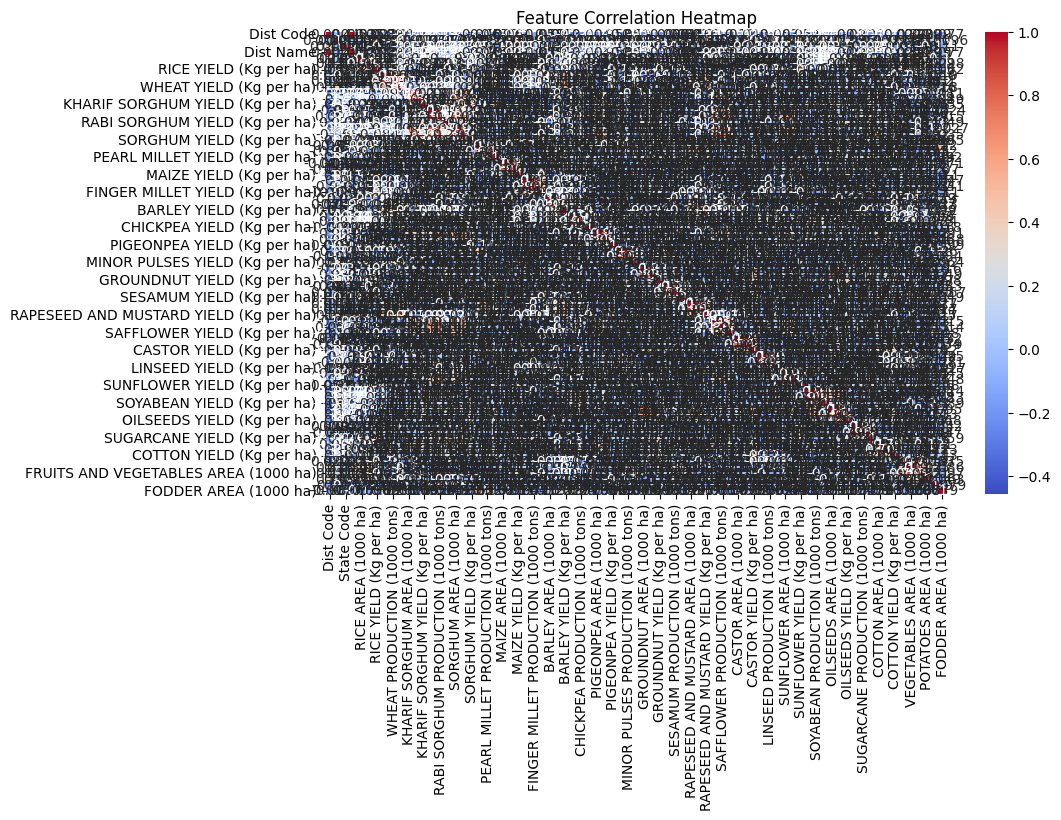

In [20]:
# Plot the distribution of RICE PRODUCTIVITY
sns.histplot(df['RICE PRODUCTION (1000 tons)'], kde=True) # Changed 'data' to 'df'
plt.title('Distribution of Rice Productivity')
plt.show()

# Correlation heatmap
district_mapping = {district: i for i, district in enumerate(df['Dist Name'].unique())}
df['Dist Name'] = df['Dist Name'].map(district_mapping)

# Convert 'Year' to numeric if it's not:
df['Year'] = pd.to_numeric(df['Year'])

# Now calculate the correlation on numeric columns only:
numeric_df = df.select_dtypes(include=np.number)
plt.figure(figsize=(10, 6))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm')
plt.title('Feature Correlation Heatmap')
plt.show()

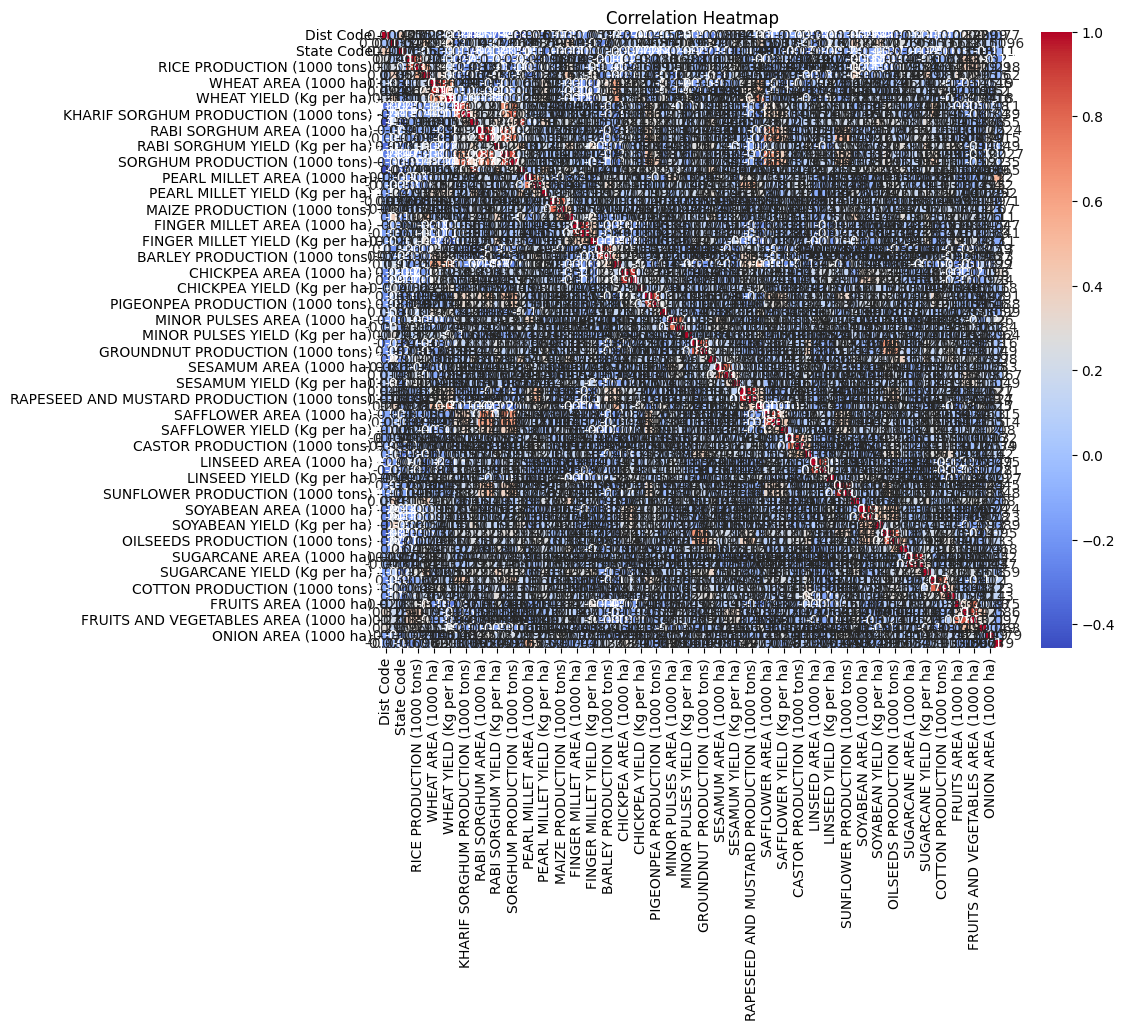

In [15]:
# Step 5: Data Visualization
# Visualizing the correlation between features
plt.figure(figsize=(10, 8))
# Select only numeric columns for correlation calculation:
numeric_df = df.select_dtypes(include=np.number)
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

In [17]:
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Feature selection (replace with relevant column names)
X = df[['RICE AREA (1000 ha)', 'RICE YIELD (Kg per ha)']]  # Example features
y = df['RICE PRODUCTION (1000 tons)']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


404/404 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - loss: 143683.9844 - val_loss: 20927.9648
Epoch 2/50
404/404 ━━━━━━━━━━━━━━━━━━━━ 7s 13ms/step - loss: 15087.7471 - val_loss: 10134.6455
Epoch 3/50
404/404 ━━━━━━━━━━━━━━━━━━━━ 8s 8ms/step - loss: 9055.9473 - val_loss: 7045.6167
Epoch 4/50
404/404 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - loss: 5556.5781 - val_loss: 4769.4766
Epoch 5/50
404/404 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - loss: 3830.6501 - val_loss: 3542.7163
Epoch 6/50
404/404 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 3110.7004 - val_loss: 2840.4919
Epoch 7/50
404/404 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 2538.5630 - val_loss: 2405.8398
Epoch 8/50
404/404 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 2081.0229 - val_loss: 2090.3254
Epoch 9/50
404/404 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1487.7341 - val_loss: 1696.7419
Epoch 10/50
404/404 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 1453.1412 - val_loss: 1406.0519
Epoch 11/50
404/404 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 1198.7775 - val_loss: 

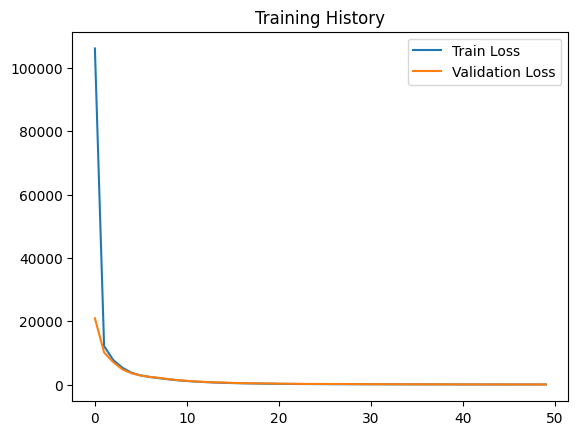

In [19]:
# Define the model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)), # Input layer with 64 units and ReLU activation
    tf.keras.layers.Dense(32, activation='relu'), # Hidden layer with 32 units and ReLU activation
    tf.keras.layers.Dense(1) # Output layer with 1 unit (for regression)
])

# Compile the model
model.compile(optimizer='adam', loss='mse') # Using Adam optimizer and Mean Squared Error loss

# Now you can train the model
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=50, batch_size=32)

# Plot training history
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title('Training History')
plt.show()